<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# EX5.  Working with Data and a real cost function.
## Mean squred error : a cost fuction for regeression problems
### $$RSS = \sum_{i=1}^{n}\big(y^{(i)}-h_\theta x^{(i)}\big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)}-h_\theta x^{(i)}\big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n}\big(y-\hat{y}\big)^2$$

In [2]:
# make data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array ([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('Shape of x_5 array :', x_5.shape)
print("shape of y_5 array:", y_5.shape)

Shape of x_5 array : (7, 1)
shape of y_5 array: (7, 1)


In [3]:
regr = LinearRegression()
regr.fit(x_5, y_5)

print('theta 0 :', regr.intercept_.shape)
print('theta 1 :', regr.coef_.shape)
print('theta 0 :', regr.intercept_[0])
print('theta 1 :', regr.coef_[0][0])

theta 0 : (1,)
theta 1 : (1, 1)
theta 0 : 0.8475351486029545
theta 1 : 1.2227264637835913


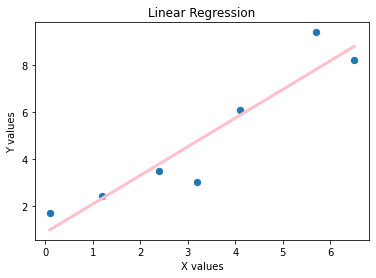

In [4]:
plt.scatter(x_5, y_5, s=40)
plt.plot(x_5, regr.predict(x_5), color = 'pink', linewidth = 3)
plt.title('Linear Regression')
plt.xlabel('X values')
plt.ylabel('Y values')

plt.show()

In [5]:
aa = np.array([1,2,3,4,5])
aa[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [6]:
# y_hat = theta0 +thetai*x
y_hat =  0.8475351486029545 + 1.2227264637835913*x_5

print('Estmated values y_hat are :\n', y_hat)
print('Actual y vales are:\n', y_5)

Estmated values y_hat are :
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual y vales are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [7]:
# mse calcultation

def mse(y, y_hat):
    #mse_calc = 1/7*sum((y - y_hat)**2)
    #mse_calc = 1/y.size*sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis =0)
    return mse_calc

print('Manually calculated mse :' ,mse(y_5, y_hat))
print('MSE regression using manually calc is :', mean_squared_error(y_5, y_hat))
print('MSE regression is :', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated mse : [0.94796558]
MSE regression using manually calc is : 0.9479655759794577
MSE regression is : 0.9479655759794577


# 3D plot for the MSE cost fuction
## make data for thetas

In [8]:
nr_thetas = 200
th_0 = np.linspace(-1, 3, num = nr_thetas)
th_1 = np.linspace(-1, 3, num = nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

### Calc. MSE using nested for loops

In [9]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j]+ plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
plot_cost

print('Shape of plot_t0:', plot_t0.shape)
print('Shape of plot_t1:', plot_t1.shape)
print('Shape of plot_cost:', plot_cost.shape)

Shape of plot_t0: (200, 200)
Shape of plot_t1: (200, 200)
Shape of plot_cost: (200, 200)


In [10]:
for i in range(3):
    for j in range(2):
      print (f'value of i is {i} and j value of j is {j}')


value of i is 0 and j value of j is 0
value of i is 0 and j value of j is 1
value of i is 1 and j value of j is 0
value of i is 1 and j value of j is 1
value of i is 2 and j value of j is 0
value of i is 2 and j value of j is 1


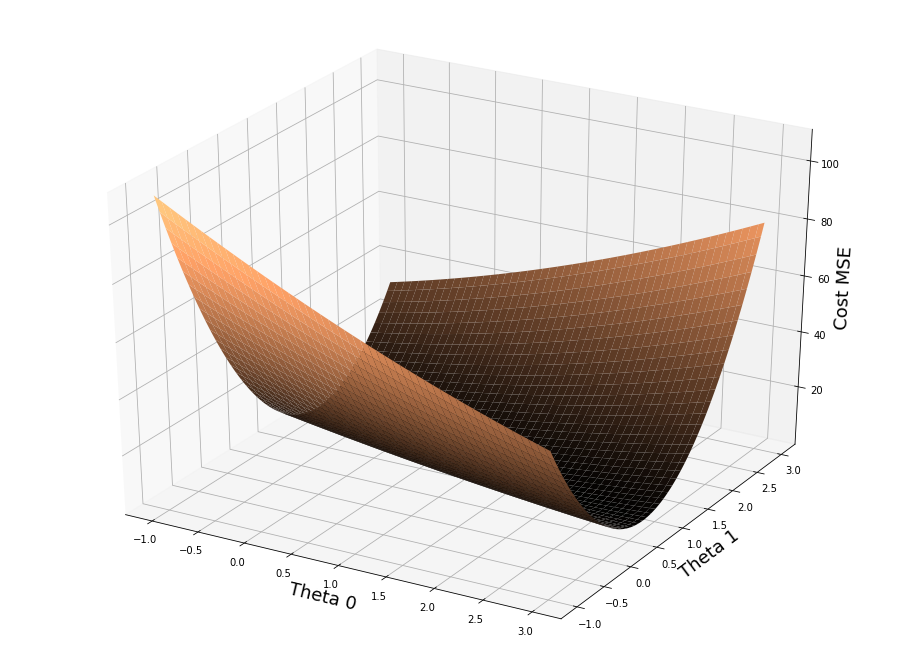

In [11]:
### Plotting MSE

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection ='3d')
ax.set_xlabel ('Theta 0', fontsize =18)
ax.set_ylabel ('Theta 1', fontsize =18)
ax.set_zlabel ('Cost MSE', fontsize =18)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap =cm.copper)

In [12]:
print('Min value of plot_cost:', plot_cost.min())
ij_min = np.unravel_index(indices =plot_cost.argmin(), dims = plot_cost.shape)
print('Min accurs at [i,j]:', ij_min)
print('Min NSE for theta0 at plot_t0[111][91] :', plot_t0[111][91])
print('Min NSE for theta0 at plot_t01[111][91] :', plot_t1[111][91])

Min value of plot_cost: 0.9483826526747164
Min accurs at [i,j]: (111, 91)
Min NSE for theta0 at plot_t0[111][91] : 0.829145728643216
Min NSE for theta0 at plot_t01[111][91] : 1.2311557788944723


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$
### $$\frac{\partial MSE}{\partial\theta_0}= -\frac {2}{n}\sum_{i = 1}^{n} \big (y^{(i)}-\theta_0-\theta_1-x^{(i)}\big) $$
### $$\frac{\partial MSE}{\partial\theta_1}= -\frac {2}{n}\sum_{i = 1}^{n} \big (y^{(i)}-\theta_0-\theta_1-x^{(i)}\big)\big(x^{(i)}\big)$$

### MSE and Gradient Descent


In [13]:
# x values, y values, array of theta parameters(theta0 at index0, theta1 at index1)
def grad(x, y, thetas):
    n= y.size

    theta0_slope = (-2/n)*sum(y-thetas[0]-thetas[1]*x)
    theta1_slope = (-2/n)*sum((y-thetas[0]-thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0])
    #return np.append(arr= theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)


In [14]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# for cscater data
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
     thetas = thetas - multiplier*grad(x_5, y_5, thetas)

     plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
     mse_vals = np.append(arr= mse_vals, values = mse(y_5, thetas[0]+thetas[1]*x_5))

print('Min occurs at theta0:',  thetas[0])
print('Min occurs at theta1:',  thetas[1])
print('MSE is :', mse(y_5, thetas[0]+thetas[1]*x_5))

Min occurs at theta0: 0.8532230461743415
Min occurs at theta1: 1.2214935332607393
MSE is : [0.94797511]


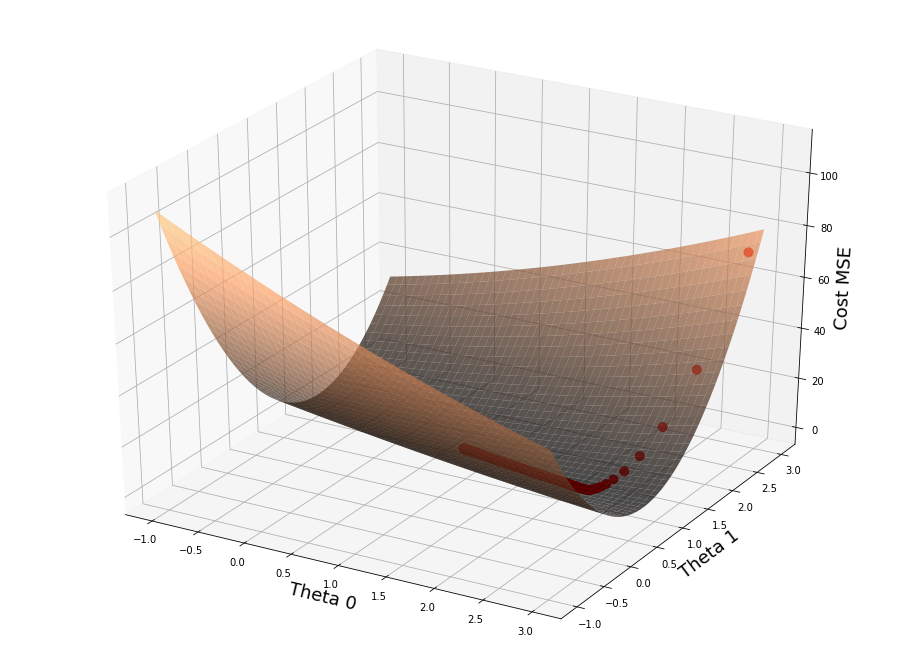

In [15]:
### Plotting MSE

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection ='3d')
ax.set_xlabel ('Theta 0', fontsize =18)
ax.set_ylabel ('Theta 1', fontsize =18)
ax.set_zlabel ('Cost MSE', fontsize =18)

ax.scatter([float(i) for i in plot_vals[:, 0]], 
           [float(i) for i in plot_vals[:, 1]], 
           [float(i) for i in mse_vals], s =80, color = 'red')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap =cm.copper, alpha = 0.7)

